In [ ]:
library(lme4)
library(ggplot2)
library(multcomp)
library(emmeans)
library(plyr)
library(performance)
library(see)
library(gridExtra)
library(car)
library(lmerTest)
library(effects)
library(moments)
library(effectsize)
library(MuMIn)

In [3]:
setwd('D:/projects/ErgoVR/code')

# read data

In [2]:
df_exe <- read.csv(file = 't50_execution.csv')
df_plan <- read.csv(file = 't50_planning.csv')

In [5]:
head(df_plan)

X,subject_id,trial_type,trial_num,fix_type,t50,inv_time,log_time
0,2006,easy,5,current_TO,0.29160615,3.429283,-1.2323512
1,2006,easy,5,current_TS,0.11374691,8.791448,-2.1737794
2,2006,easy,5,next_TO,0.49726099,2.011016,-0.6986403
3,2006,easy,5,next_TS,0.01697754,58.901366,-4.0758643
4,2006,easy,5,other,0.04645662,21.525456,-3.0692363
6,2006,easy,5,prev_TS,0.01018812,98.153553,-4.5865331


# center the categorical and continuous variables

In [3]:
df_exe$trial_type.effect <- factor(df_exe$trial_type)
c <-contr.treatment(2, base=1)
my.coding <- matrix(rep(1/2,2),ncol=1)
my.simpleT <- c - my.coding
contrasts(df_exe$trial_type.effect) <- my.simpleT
contrasts(df_exe$trial_type.effect)

df_plan$trial_type.effect <- factor(df_plan$trial_type)
c <-contr.treatment(2, base=1)
my.coding <- matrix(rep(1/2,2),ncol=1)
my.simpleT <- c - my.coding
contrasts(df_plan$trial_type.effect) <- my.simpleT
contrasts(df_plan$trial_type.effect)

,2
easy,-0.5
hard,0.5


,2
easy,-0.5
hard,0.5


In [4]:
df_exe$fix_type.effect <- factor(df_exe$fix_type)
c <-contr.treatment(7, base=1)
my.coding <- matrix(rep(1/7,42),ncol=6)
my.simpleT <- c - my.coding
contrasts(df_exe$fix_type.effect) <- my.simpleT
contrasts(df_exe$fix_type.effect)

df_plan$fix_type.effect <- factor(df_plan$fix_type)
c <-contr.treatment(7, base=1)
my.coding <- matrix(rep(1/7,42),ncol=6)
my.simpleT <- c - my.coding
contrasts(df_plan$fix_type.effect) <- my.simpleT
contrasts(df_plan$fix_type.effect)

,2,3,4,5,6,7
current_TO,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571
current_TS,0.8571429,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571
next_TO,-0.1428571,0.8571429,-0.1428571,-0.1428571,-0.1428571,-0.1428571
next_TS,-0.1428571,-0.1428571,0.8571429,-0.1428571,-0.1428571,-0.1428571
other,-0.1428571,-0.1428571,-0.1428571,0.8571429,-0.1428571,-0.1428571
prev_TO,-0.1428571,-0.1428571,-0.1428571,-0.1428571,0.8571429,-0.1428571
prev_TS,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571,0.8571429


,2,3,4,5,6,7
current_TO,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571
current_TS,0.8571429,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571
next_TO,-0.1428571,0.8571429,-0.1428571,-0.1428571,-0.1428571,-0.1428571
next_TS,-0.1428571,-0.1428571,0.8571429,-0.1428571,-0.1428571,-0.1428571
other,-0.1428571,-0.1428571,-0.1428571,0.8571429,-0.1428571,-0.1428571
prev_TO,-0.1428571,-0.1428571,-0.1428571,-0.1428571,0.8571429,-0.1428571
prev_TS,-0.1428571,-0.1428571,-0.1428571,-0.1428571,-0.1428571,0.8571429


# make models

In [5]:

model_plan <- lmer(
    t50 ~ 1 + trial_type.effect * fix_type.effect
    + (1 + trial_type.effect * fix_type.effect | subject_id),
    data=df_plan,
    control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=10e5))
)
summary(model_plan)


boundary (singular) fit: see ?isSingular
Warning message:
"Model failed to converge with 6 negative eigenvalues: -2.2e+00 -1.6e+01 -9.2e+01 -1.2e+02 -2.7e+02 -4.8e+02"
Correlation matrix not shown by default, as p = 14 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
t50 ~ 1 + trial_type.effect * fix_type.effect + (1 + trial_type.effect *  
    fix_type.effect | subject_id)
   Data: df_plan
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+06))

REML criterion at convergence: -4270.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8557 -0.5117 -0.1502  0.4557  4.0739 

Random effects:
 Groups     Name                                Variance  Std.Dev. Corr       
 subject_id (Intercept)                         0.0003824 0.01956             
            trial_type.effect2                  0.0007530 0.02744  -0.46      
            fix_type.effect2                    0.0037144 0.06095   0.03 -0.56
            fix_type.effect3                    0.0012918 0.03594   0.32 -0.21
            fix_type.effect4                    0.0035606 0.05967   0.40 -0.39
            fix_type.effect5                    0.0012021 0.03467  -0.

In [ ]:
tmp <- parameters::model_parameters(model_plan, effects = "fixed", df_method = "satterthwaite")
print(tmp)
write.csv(tmp, './model_plan.csv')

In [6]:
summary(aov(t50 ~ trial_type * fix_type, data=df_plan))

                      Df Sum Sq Mean Sq F value   Pr(>F)    
trial_type             1   0.09   0.090   3.284 0.070028 .  
fix_type               6 126.85  21.142 774.675  < 2e-16 ***
trial_type:fix_type    6   0.68   0.113   4.157 0.000357 ***
Residuals           5465 149.15   0.027                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [7]:
library(multcomp)
res = aov(t50 ~ trial_type * fix_type, data=df_plan)
summary(glht(res, linfct = mcp(fix_type = "Tukey")))

Warning message in mcp2matrix(model, linfct = linfct):
"covariate interactions found -- default contrast might be inappropriate"Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = t50 ~ trial_type * fix_type, data = df_plan)

Linear Hypotheses:
                              Estimate Std. Error t value Pr(>|t|)    
current_TS - current_TO == 0 -0.037960   0.010641  -3.567  0.00662 ** 
next_TO - current_TO == 0    -0.039134   0.010423  -3.755  0.00345 ** 
next_TS - current_TO == 0    -0.036849   0.011886  -3.100  0.03137 *  
other - current_TO == 0      -0.306042   0.009760 -31.355  < 0.001 ***
prev_TO - current_TO == 0    -0.312346   0.011525 -27.102  < 0.001 ***
prev_TS - current_TO == 0    -0.334478   0.010066 -33.230  < 0.001 ***
next_TO - current_TS == 0    -0.001173   0.011380  -0.103  1.00000    
next_TS - current_TS == 0     0.001111   0.012734   0.087  1.00000    
other - current_TS == 0      -0.268082   0.010777 -24.875  < 0.001 ***
prev_TO - current_TS == 0    -0.274386   0.012398 -22.132  < 0.001 ***
prev_TS - current_TS == 0    -0.2

In [8]:
Anova(res)

,Sum Sq,Df,F value,Pr(>F)
trial_type,0.2329486,1,8.535402,0.0034973084
fix_type,126.8547171,6,774.674528,0.0000000000
trial_type:fix_type,0.6806930,6,4.156846,0.0003573192
Residuals,149.1510314,5465,NA,NA


In [9]:
model_exe <- lmer(
    t50 ~ 1 + trial_type.effect * fix_type.effect
    + (1 + trial_type.effect * fix_type.effect | subject_id),
    data=df_exe,
    control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=4e5))
)
summary(model_exe)

Warning message in optwrap(optimizer, devfun, getStart(start, rho$pp), lower = rho$lower, :
"convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded"boundary (singular) fit: see ?isSingular
Warning message:
"Model failed to converge with 1 negative eigenvalue: -4.6e-03"
Correlation matrix not shown by default, as p = 14 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
t50 ~ 1 + trial_type.effect * fix_type.effect + (1 + trial_type.effect *  
    fix_type.effect | subject_id)
   Data: df_exe
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 4e+05))

REML criterion at convergence: -3738

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8982 -0.5639 -0.0850  0.5231  3.9100 

Random effects:
 Groups     Name                                Variance  Std.Dev. Corr       
 subject_id (Intercept)                         0.0002474 0.01573             
            trial_type.effect2                  0.0008410 0.02900  -0.09      
            fix_type.effect2                    0.0028641 0.05352   0.77 -0.32
            fix_type.effect3                    0.0054125 0.07357   0.85 -0.25
            fix_type.effect4                    0.0043717 0.06612   0.60 -0.13
            fix_type.effect5                    0.0050044 0.07074   0.69 

In [10]:
tmp <- parameters::model_parameters(model_exe, effects = "fixed", df_method = "satterthwaite")
print(tmp)
write.csv(tmp, './model_exe.csv')

Warning message:
"Model failed to converge with 1 negative eigenvalue: -1.1e-02"

# Fixed Effects

Parameter                             | Coefficient |       SE |         95% CI |      t |     df |      p
----------------------------------------------------------------------------------------------------------
(Intercept)                           |        0.37 | 3.33e-03 | [ 0.36,  0.37] | 109.90 |  48.82 | < .001
trial_type.effect2                    |       -0.02 | 6.41e-03 | [-0.04, -0.01] |  -3.80 |  58.93 | < .001
fix_type.effect2                      |        0.42 |     0.01 | [ 0.39,  0.44] |  32.13 |  64.74 | < .001
fix_type.effect3                      |        0.43 |     0.02 | [ 0.40,  0.46] |  28.49 |  54.68 | < .001
fix_type.effect4                      |        0.36 |     0.01 | [ 0.33,  0.39] |  24.56 |  58.75 | < .001
fix_type.effect5                      |        0.17 |     0.01 | [ 0.14,  0.19] |  11.40 |  50.47 | < .001
fix_type.effect6                      |        0.33 |     0.01 | [ 0.30,  0.35] |  24.57 |  61.73 | < .001
fix_type.effect7    

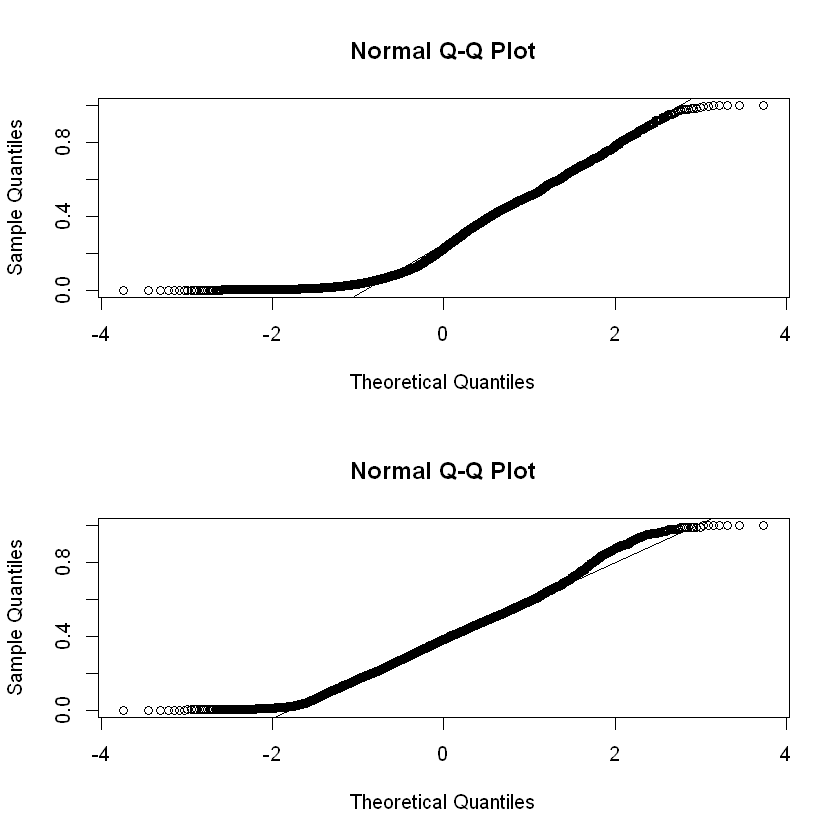

In [18]:
par(mfrow=c(2,1))
qqnorm(df_plan$t50); qqline(df_plan$t50)
qqnorm(df_exe$t50); qqline(df_exe$t50)
#qqnorm(df_plan$log_time); qqline(df_plan$log_time)